<a href="https://colab.research.google.com/github/gitmayanksingh/MachineLearning/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from plotnine import *

# color pallette
cdr = ['#393e46', '#ff2e63', '#30e3ca'] # grey - red - blue
idr = ['#f8b400', '#ff2e63', '#30e3ca'] # yellow - red - blue

In [2]:
pip install calmap

In [0]:
import calmap
import plotly.express as px
import folium

In [0]:
data = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])

In [0]:
data['Country/Region'] =  data['Country/Region'].replace('Mainland China','China')

In [6]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
1,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
2,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
3,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
4,Gansu,China,36.0611,103.8343,2020-01-22,0,0,0


In [7]:
data.shape

(7612, 8)

In [8]:
data.isnull().sum()

Province/State    3608
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [0]:
# filling missing values with NA
data[['Province/State']] = data[['Province/State']].fillna('NA')

In [0]:
ship = data[data['Province/State']=='Diamond Princess cruise ship']

In [11]:
ship.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
70,Diamond Princess cruise ship,Others,35.4437,139.638,2020-01-22,0,0,0
243,Diamond Princess cruise ship,Others,35.4437,139.638,2020-01-23,0,0,0
416,Diamond Princess cruise ship,Others,35.4437,139.638,2020-01-24,0,0,0
589,Diamond Princess cruise ship,Others,35.4437,139.638,2020-01-25,0,0,0
762,Diamond Princess cruise ship,Others,35.4437,139.638,2020-01-26,0,0,0


In [0]:
world = data[data['Province/State']!='Diamond Princess cruise ship']

In [0]:
china = world[world['Country/Region']=='China']

In [0]:
outside_china = world[world['Country/Region']!='China']

In [0]:
india = outside_china[outside_china['Country/Region']=='India']

In [0]:
#india

In [0]:
world_latest = world[world['Date'] == max(data['Date'])].reset_index()

In [0]:
#world_latest

In [0]:
china_latest = world_latest[world_latest['Country/Region']=='China']

In [0]:
#china_latest

In [0]:
outside_china_latest = world_latest[world_latest['Country/Region']!='China']

In [0]:
#outside_china_latest

In [0]:
india_latest = outside_china_latest[outside_china_latest['Country/Region']=='India']

In [24]:
india_latest

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
57,7496,NA,India,21.0,78.0,2020-03-05,30,0,3


In [0]:
world_latest_grouped = world_latest.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [26]:
world_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,1,0,0
1,Algeria,12,0,0
2,Andorra,1,0,0
3,Argentina,1,0,0
4,Armenia,1,0,0
...,...,...,...,...
84,UK,115,1,8
85,US,221,12,8
86,Ukraine,1,0,0
87,United Arab Emirates,29,0,5


In [0]:
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [28]:
china_latest_grouped

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,990,6,970
1,Beijing,418,8,297
2,Chongqing,576,6,512
3,Fujian,296,1,277
4,Gansu,102,2,87
5,Guangdong,1351,7,1181
6,Guangxi,252,2,214
7,Guizhou,146,2,114
8,Hainan,168,6,158
9,Hebei,318,6,304


In [0]:
outside_china_latest_grouped = outside_china_latest.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [30]:
outside_china_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,1,0,0
1,Algeria,12,0,0
2,Andorra,1,0,0
3,Argentina,1,0,0
4,Armenia,1,0,0
...,...,...,...,...
83,UK,115,1,8
84,US,221,12,8
85,Ukraine,1,0,0
86,United Arab Emirates,29,0,5


In [0]:
india_latest_grouped = india_latest.groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [32]:
india_latest_grouped

,Province/State,Confirmed,Deaths,Recovered
0,NA,30,0,3


In [33]:
temp = world_latest.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
temp.style.background_gradient(cmap='Pastel1_r')

In [34]:
temp_1 = world_latest_grouped[['Country/Region','Confirmed', 'Deaths', 'Recovered']]
temp_1 = temp_1.sort_values(by='Confirmed',ascending=False)
temp_1 = temp_1.reset_index(drop=True)
temp_1.style.background_gradient(cmap='Paired')

,Country/Region,Confirmed,Deaths,Recovered
0,China,80422,3013,52240
1,South Korea,6088,35,41
2,Italy,3858,148,414
3,Iran,3513,107,739
4,Germany,482,0,16
5,France,377,6,12
6,Japan,360,6,43
7,Spain,259,3,2
8,US,221,12,8
9,Singapore,117,0,78


Countries with their <b> DEATH </b> numbers

In [35]:
temp_d = world_latest_grouped[['Country/Region','Deaths']]
temp_d = temp_d.sort_values(by='Deaths',ascending=False)
temp_d = temp_d.reset_index(drop=True)
temp_d = temp_d[temp_d.Deaths>0]
temp_d.style.background_gradient(cmap='Reds')

,Country/Region,Deaths
0,China,3013
1,Italy,148
2,Iran,107
3,South Korea,35
4,US,12
5,Japan,6
6,France,6
7,Spain,3
8,Hong Kong,2
9,Australia,2


Countries with <b> NO CASES RECOVERED </b>

In [36]:
temp_n_r = world_latest_grouped[['Country/Region','Confirmed','Deaths','Recovered']]
temp_n_r = temp_n_r.sort_values(by='Confirmed',ascending=False)
temp_n_r = temp_n_r[temp_n_r.Recovered==0]
temp_n_r = temp_n_r.reset_index(drop=True)
temp_n_r.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,Sweden,94,0,0
1,Norway,87,0,0
2,Netherlands,82,0,0
3,Kuwait,58,0,0
4,Bahrain,55,0,0
5,Austria,41,0,0
6,Iraq,35,2,0
7,Iceland,34,0,0
8,Greece,31,0,0
9,San Marino,21,1,0


Countries with **ALL CASES RECOVERED**

In [37]:
temp_a_r = world_latest_grouped[['Country/Region','Confirmed','Deaths','Recovered']]
temp_a_r = temp_a_r.sort_values(by='Confirmed',ascending=False)
temp_a_r = temp_a_r[temp_a_r.Recovered==temp_a_r.Confirmed]
temp_a_r = temp_a_r.reset_index(drop=True)
temp_a_r.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Deaths,Recovered
0,Vietnam,16,0,16
1,Sri Lanka,1,0,1
2,Cambodia,1,0,1
3,Nepal,1,0,1


Countries with **ALL CASES DIED**

In [38]:
temp_a_d = world_latest_grouped[['Country/Region','Confirmed','Deaths','Recovered']]
temp_a_d = temp_a_d.sort_values(by='Confirmed',ascending=False)
temp_a_d = temp_a_d[temp_a_d.Deaths==temp_a_d.Confirmed]
temp_a_d = temp_a_d.reset_index(drop=True)
temp_a_d.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered


<b>CHINA</b>

In [39]:
temp_c = china_latest_grouped[['Province/State','Confirmed', 'Deaths', 'Recovered']]
temp_c = temp_c.sort_values(by='Confirmed',ascending=False)
temp_c = temp_c.reset_index(drop=True)
temp_c.style.background_gradient(cmap='Paired')

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67466,2902,40592
1,Guangdong,1351,7,1181
2,Henan,1272,22,1239
3,Zhejiang,1215,1,1124
4,Hunan,1018,4,938
5,Anhui,990,6,970
6,Jiangxi,935,1,901
7,Shandong,758,6,578
8,Jiangsu,631,0,583
9,Chongqing,576,6,512


Province/State in <b> CHINA </b> with their <b> DEATH </b> numbers




In [40]:
temp_c_d = china_latest_grouped[['Province/State','Deaths']]
temp_c_d = temp_c_d.sort_values(by='Deaths',ascending=False)
temp_c_d = temp_c_d.reset_index(drop=True)
temp_c_d = temp_c_d[temp_c_d.Deaths>0]
temp_c_d.style.background_gradient(cmap='Reds')

,Province/State,Deaths
0,Hubei,2902
1,Henan,22
2,Heilongjiang,13
3,Beijing,8
4,Guangdong,7
5,Hainan,6
6,Hebei,6
7,Anhui,6
8,Chongqing,6
9,Shandong,6


Province/State in <b> CHINA </b> with NO CASES <b> RECOVERED </b>

In [41]:
temp_c_n_r = china_latest_grouped[['Province/State','Confirmed','Deaths','Recovered']]
temp_c_n_r = temp_c_n_r.sort_values(by='Confirmed',ascending=False)
temp_c_n_r = temp_c_n_r[temp_c_n_r.Recovered==0]
temp_c_n_r = temp_c_n_r.reset_index(drop=True)
temp_c_n_r.style.background_gradient(cmap='Reds')

,Province/State,Confirmed,Deaths,Recovered


<b> CHINA </b> is <b style="color:green"> RECOVERING </b>

Province/State in <b> CHINA </b> with ALL CASES <b> RECOVERED </b>

In [42]:
temp_c_a_r = china_latest_grouped[['Province/State','Confirmed','Deaths','Recovered']]
temp_c_a_r = temp_c_a_r.sort_values(by='Confirmed',ascending=False)
temp_c_a_r = temp_c_a_r[temp_c_a_r.Recovered==temp_c_a_r.Confirmed]
temp_c_a_r = temp_c_a_r.reset_index(drop=True)
temp_c_a_r.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered
0,Qinghai,18,0,18
1,Tibet,1,0,1


In [43]:
fig = px.bar(world_latest_grouped[['Country/Region', 'Confirmed']].sort_values('Confirmed', ascending=False), 
             y="Confirmed", x="Country/Region", color='Country/Region', 
             log_y=True, template='ggplot2', title='Confirmed Cases')
fig.show()

In [44]:
fig = px.bar(world_latest_grouped[['Country/Region', 'Deaths']].sort_values('Deaths', ascending=False), 
             y="Deaths", x="Country/Region", color='Country/Region', title='Deaths',
             log_y=True, template='ggplot2')
fig.show()

**Coronavirus Cases Over Time**

In [0]:
date_a_r = world.groupby('Date')[['Country/Region','Confirmed']].sum().reset_index()

In [0]:
#date_a_r

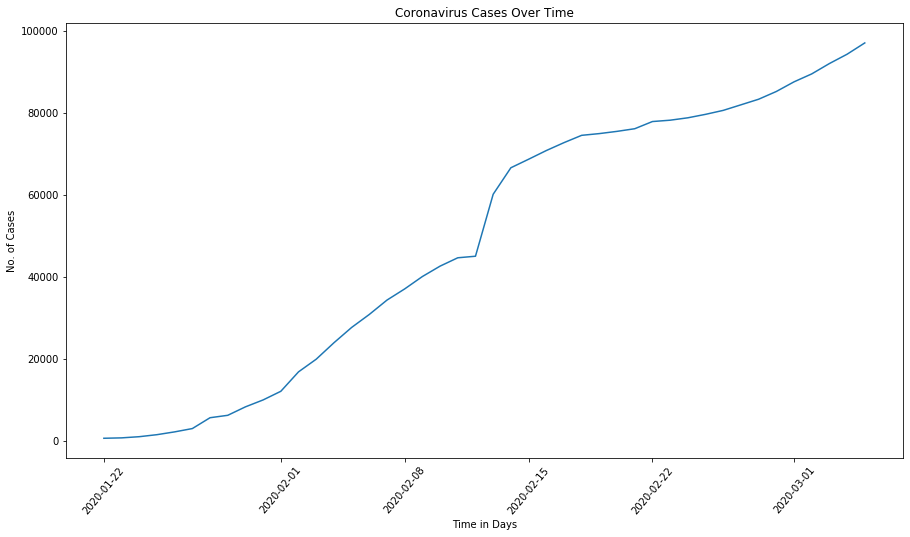

In [47]:
plt.figure(figsize=(15, 8))
plt.plot(date_a_r['Date'], date_a_r['Confirmed'])
plt.title('Coronavirus Cases Over Time')
plt.xlabel('Time in Days')
plt.ylabel('No. of Cases')
plt.xticks(rotation=50)
plt.show()

In [0]:
date_a_r_1 = world.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [49]:
date_a_r_1

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
3911,Vietnam,2020-03-01,16,0,16
3912,Vietnam,2020-03-02,16,0,16
3913,Vietnam,2020-03-03,16,0,16
3914,Vietnam,2020-03-04,16,0,16


In [50]:
fig = px.bar(date_a_r_1, x="Date", y="Confirmed", color='Country/Region', orientation='v', height=600,
             title='Coronavirus Confirmed Cases Over Time ', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

**Coronavirus Cases Death Over Time**

In [0]:
date_a_d = world.groupby('Date')[['Country/Region','Deaths']].sum().reset_index()

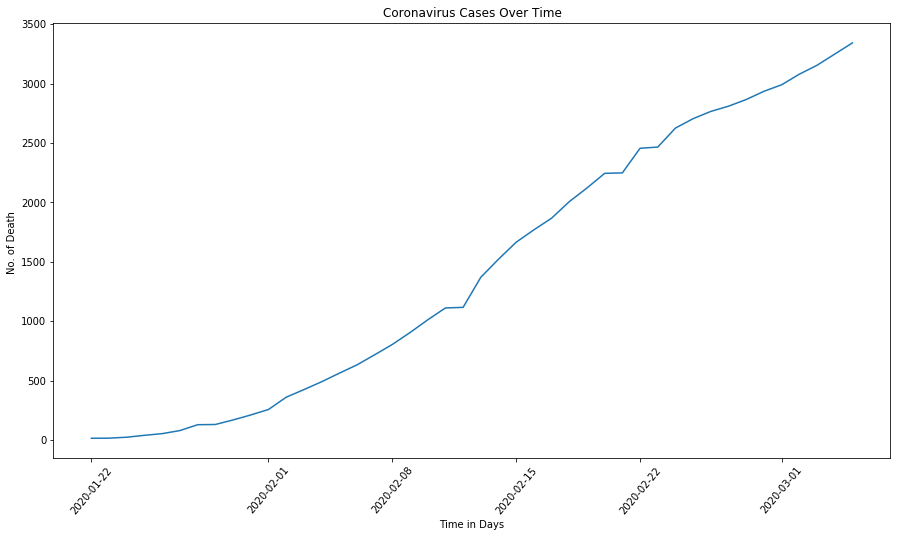

In [52]:
plt.figure(figsize=(15, 8))
plt.plot(date_a_d.Date, date_a_d.Deaths)
plt.title('Coronavirus Cases Over Time')
plt.xlabel('Time in Days')
plt.ylabel('No. of Death ')
plt.xticks(rotation=50)
plt.show()

In [53]:
fig = px.bar(date_a_r_1, x="Date", y="Deaths", color='Country/Region', orientation='v', height=600,
             title='Coronavirus Deaths Cases Over Time ', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

**Spread over time in CHINA**

In [0]:
date_china = china.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [55]:
temp_spd_china = date_china.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp_spd_china, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases in China', color_discrete_sequence=cdr)
fig.show()

**Spread over time in OUTSIDE CHINA**

In [0]:
date_out_china = outside_china.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [57]:
temp_spd_out_china = date_out_china.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp_spd_out_china, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases Outside China', color_discrete_sequence=idr)
fig.show()

<b>CORONAVIRUS WORLD MAP</b>

In [0]:
# World wide
world_map = folium.Map(location=[0, 0], tiles='cartodbpositron',
            min_zoom=1, max_zoom=4, zoom_start=1,width='50%',height='50%',position='absolute')

In [0]:
#world_map

In [0]:
for i in range(0, len(world_latest)):
    folium.Circle(
        location=[world_latest.iloc[i]['Lat'], world_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(world_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(world_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(world_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(world_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(world_latest.iloc[i]['Recovered']),
        radius=int(world_latest.iloc[i]['Confirmed'])).add_to(world_map)

In [61]:
world_map

<b>CORONAVIRUS CHINA MAP</b>

In [0]:
# China wide
china_map = folium.Map(location=[30,116], tiles='cartodbpositron',
            min_zoom=2, max_zoom=5, zoom_start=3)

In [0]:
#china_map

In [0]:
for i in range(0, len(china_latest)):
    folium.Circle(
        location=[china_latest.iloc[i]['Lat'], china_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(china_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(china_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(china_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(china_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(china_latest.iloc[i]['Recovered']),
        radius=int(china_latest.iloc[i]['Confirmed'])).add_to(china_map)

In [65]:
china_map

<b> Affected Countries Till Now</b>

In [0]:
aff_fig = px.choropleth(world_latest_grouped,title='Countries with Confirmed Cases',locations='Country/Region',color='Confirmed',locationmode='country names'
           ,hover_name='Country/Region',color_continuous_scale='agsunset',range_color=[1,50])

In [67]:
aff_fig.update(layout_coloraxis_showscale=False)
aff_fig.show()

<b> Countries with DEATH Till Now</b>

In [68]:
aff_fig_d = px.choropleth(world_latest_grouped,title='Countries with Death Cases',locations='Country/Region',color='Deaths',locationmode='country names'
           ,hover_name='Country/Region',color_continuous_scale='Reds',range_color=[1,50])
aff_fig_d.update(layout_coloraxis_showscale=False)
aff_fig_d.show()

**Diamond Princess Cruise Ship**

In [69]:
temp_ship = ship.sort_values(by='Date', ascending=False).head(1)
temp_ship = temp_ship[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)
temp_ship.style.background_gradient(cmap='rainbow')

,Province/State,Confirmed,Deaths,Recovered
0,Diamond Princess cruise ship,706,6,10


In [0]:
temp_ship_1 = ship.groupby('Date')['Confirmed',	'Deaths'	,'Recovered'].sum().reset_index()

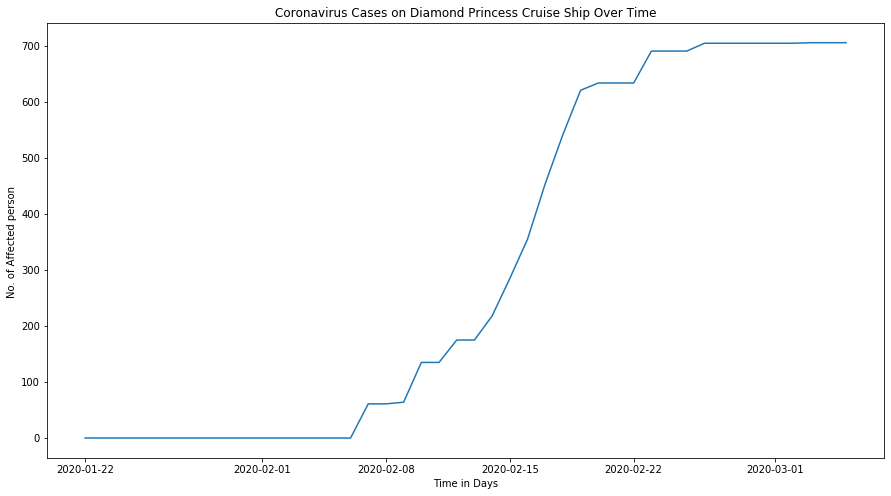

In [71]:
plt.figure(figsize=(15, 8))
plt.plot(temp_ship_1.Date, temp_ship_1.Confirmed)
plt.title('Coronavirus Cases on Diamond Princess Cruise Ship Over Time')
plt.xlabel('Time in Days')
plt.ylabel('No. of Affected person ')
plt.xticks()
plt.show()

**Number of Cases Every-Day OUTSIDE CHINA**

In [0]:
every_day_outside_china =  outside_china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff().reset_index()

In [73]:
every_day_outside_china = every_day_outside_china.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(every_day_outside_china, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=idr)
fig.update_layout(barmode='group')
fig.show()

**Number of Cases Every-Day IN CHINA**

In [0]:
every_day_china = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff().reset_index()

In [75]:
every_day_china = every_day_china.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(every_day_china, x="Date", y="value", color='variable', 
             title='Every Day Cases In China',
             color_discrete_sequence=idr)
fig.update_layout(barmode='group')
fig.show()

<b>Mortality Rate = No. Death Cases / No. of Confirmed Cases * 100 </b><br>
<b>Recovery Rate = No. Recovered Cases / No. of Confirmed Cases * 100 <br></b>
(To every 100 Indivisual)

In [76]:
temp_world = world.groupby('Date').sum().reset_index()
temp_world.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,5423.59682,2631.0363,555,17,28
1,2020-01-23,5423.59682,2631.0363,653,18,30
2,2020-01-24,5423.59682,2631.0363,941,26,36
3,2020-01-25,5423.59682,2631.0363,1434,42,39
4,2020-01-26,5423.59682,2631.0363,2118,56,52


In [0]:
temp_world['No_of_death_to_100_confirmed_cases'] = round(temp_world['Deaths']/temp_world['Confirmed'],3)*100
temp_world['No_of_Recovered_to_100_confirmed_cases'] = round(temp_world['Recovered']/temp_world['Confirmed'],3)*100
temp_world['No_of_Recovered_to_1_Death_cases'] = round(temp_world['Recovered']/temp_world['Deaths'],3)

In [78]:
temp_world.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered,No_of_death_to_100_confirmed_cases,No_of_Recovered_to_100_confirmed_cases,No_of_Recovered_to_1_Death_cases
0,2020-01-22,5423.59682,2631.0363,555,17,28,3.1,5.0,1.647
1,2020-01-23,5423.59682,2631.0363,653,18,30,2.8,4.6,1.667
2,2020-01-24,5423.59682,2631.0363,941,26,36,2.8,3.8,1.385
3,2020-01-25,5423.59682,2631.0363,1434,42,39,2.9,2.7,0.929
4,2020-01-26,5423.59682,2631.0363,2118,56,52,2.6,2.5,0.929


In [0]:
temp_world = temp_world.melt(id_vars='Date', 
                 value_vars=['No_of_death_to_100_confirmed_cases','No_of_Recovered_to_100_confirmed_cases', 'No_of_Recovered_to_1_Death_cases'], 
                 var_name='Ratio', 
                 value_name='Value')

In [80]:
fig = px.line(temp_world, x="Date", y="Value", color='Ratio', 
              title='Recovery and Mortality Rate Over The Time',color_discrete_sequence=cdr)
fig.show()

**Recovered:Death (Over the World)**

In [0]:
import plotly.graph_objs as go

In [82]:
world.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
1,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
2,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
3,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
4,Gansu,China,36.0611,103.8343,2020-01-22,0,0,0


In [0]:
values = [world['Recovered'].sum(),world['Deaths'].sum()]
colors = ['mediumturquoise', 'orangered']

In [85]:
fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths'], 
                             values=values , hole=.3)])

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Death/Recovered Rate (Till March 5th, 2020)", height=500, width=700, showlegend=False)

fig.show()

**Recovered:Death (China)**

In [0]:
values_china = [china['Recovered'].sum(),china['Deaths'].sum()]
colors_china = ['rainbow', 'orangered']

In [87]:
fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths'], 
                             values=values_china , hole=.3)])

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors_china, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Death/Recovered Rate in China (Till March 5th, 2020)", height=500, width=700, showlegend=False)

fig.show()